# #DataMadness Group 18 👩🏼‍🔬👨🏻‍🔬👨🏻‍🔬

🦕 i6323791, Tabea Heusel \
🐍 i6316967, Panagiotis Binikos \
🐅 i6207693, Stijn Hennissen 

# Introduction

In this **#datamadness** project we investigate a movie dataset about the movies on the website *hydramovies*. \
The dataset is available here: https://data.world/iliketurtles/movie-dataset \
Our plan of action is the following:

#### 1. Data cleaning 🧹 
    1.1 Issues with the dataset 
    1.2 Missing values 
    1.3 Fixing issues and missing values 
#### 2. EDA 📊 
    2.1 Which types of movies are present? 
    2.2 From when?
    2.3 What genres? 
    2.4 + more EDA 
#### 3. Analysis of movie summaries 📝 
    3.1 Does the genre of a movie influence the kind of language that is used in summaries? 
#### 4. Rating prediction 👍👎 
    4.1 Based on any other features 
    4.2 based on duration 
#### 5. Create a movie recommender system 🤖 
    5.1 Can movie suggestions be presented to users according to given preferences (genre, length, average rating, …)? 
    5.2 Are the suggestions good? 

## Document Structure

The document is split into the following sections/ subsections and can be accessed quickly here: \
1. [Imports](#sec_imports)
2. [Data Cleaning](#sec_cleaning)
3. [EDA](#sec_eda)
4. [Analysis of Summaries](#sec_summaries)
5. [Rating prediction](#sec_pred)
6. [Movie Recommender System](#sec_recsys)

## Let's go

![meme.jpeg](meme.jpeg)

# 1 Imports  <a id='sec_imports'></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 2 Data Cleaning <a id='sec_cleaning'></a>

In [37]:
#%%capture 
# supresses output
original_data = pd.read_csv("hydra_movie_scrape.csv")
original_data.head()

#First we will see if we have some movies twice in our data frame
data = original_data
data = data.drop_duplicates(subset=['title'])


#From the data count we see that they are missing some vallues 
data = data.dropna(subset=['cast'])
data = data.dropna(subset=['writers'])
data = data.dropna(subset=['summary'])
data = data.dropna(subset=['short_summary'])

#We drop the column that contains the link for the youtube trailer and movie poster for each of the movies
data = data.drop(columns=['youtube_trailer', 'movie_poster'])
# print(data.count())

# print(sum(data['genres'] == 'Uncategorized'))
data = data[data['runtime'] != 0]
data = data[data['genres'] !='Uncategorized']

# #split genres , max number of genres for each movie is 5 
# genres_split = data['genres'].str.split('[,|]', expand=True)
# genres_split.columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5']
# genres_split

# data = data.join(genres_split)
data = data.reset_index()
data

,index,title,year,summary,short_summary,genres,imdb_id,runtime,rating,director,writers,cast
0,1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,Documentary|Music,tt0436629,75,7.9,Greg Whiteley,Arthur Kane,Sylvain Sylvain
1,2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,Adventure|Animation|Comedy|Family|Fantasy,tt0300195,65,6.8,Tony Craig,Thomas Hart,Carlos Alazraqui|Wayne Allwine
2,4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",Drama,tt2018111,99,7.6,Vincent Grashaw,Brett Haley,Arman Darbo|Sawyer Barth
3,5,An Extremely Goofy Movie,2000,It's a big time in Max's life. He's college bo...,"Max goes to college, but to his embarassment h...",Animation|Comedy|Family|Sport,tt0208185,79,6.4,Douglas McCarthy,Scott Spencer Gorden,Bill Farmer|Jason Marsden|Jeff Bennett
4,6,Peter Rabbit,2018,Based on the books by Beatrix Potter: Peter Ra...,Feature adaptation of Beatrix Potter's classic...,Adventure|Animation|Comedy|Family|Fantasy,tt5117670,95,6.6,Will Gluck,Rob Lieber,Fayssal Bazzi|James Corden
...,...,...,...,...,...,...,...,...,...,...,...,...
3679,3934,Skyscraper,2018,FBI Hostage Rescue Team leader and U.S. war ve...,A security expert must infiltrate a burning sk...,Action|Thriller,tt5758778,102,6.0,Rawson Marshall Thurber,Rawson Marshall Thurber,Chin Han|Dwayne Johnson|Neve Campbell
3680,3935,Trench 11,2017,"In the final days of WWI, an allied army unit ...","In the final days of WWI, an allied army unit ...",Horror|Thriller|War,tt5033290,90,5.3,Leo Scherman,Matt Booi,Charlie Carrick|Robert Stadlober|Rossif Suther...
3681,3936,My Daddy's in Heaven,2017,"Becca, Adam and their 5-year-old daughter Acie...","Becca, Adam and their 5-year-old daughter Acie...",Comedy|Drama|Family,tt6460276,92,5.8,Waymon Boone,Joseph Nasser,Corbin Bernsen|Jenn Gotzon Chandler|Lee Benton
3682,3937,Keeping Up with the Steins,2006,"In toney Brentwood, Benjamin Fiedler prepares ...",A 13-year-old boy uses his upcoming bar mitzva...,Comedy,tt0415949,90,5.4,Scott Marshall,Mark Zakarin,Daryl Sabara|Garry Marshall|Jeremy Piven


In [46]:
# the ohe of the genres is code from here:
# https://stackoverflow.com/questions/62408093/one-hot-encoding-multiple-categorical-data-in-a-column

df = data

# separate all genres into one list, considering comma + space as separators
genre = df['genres'].str.split('[,|]').tolist()
# flatten the list
flat_genre = [item for sublist in genre for item in sublist]
# convert to a set to make unique
set_genre = set(flat_genre)
# back to list
unique_genre = list(set_genre)

# create columns by each unique genre
df = df.reindex(df.columns.tolist() + unique_genre, axis=1, fill_value=0)

# for each value inside column, update the dummy
for index, row in df.iterrows():
    for val in row.genres.split('|'):
        if val != 'NA':
            df.loc[index, val] = 1

df.drop('genres', axis = 1, inplace = True)    
ohe_genre_data = df
ohe_genre_data.columns

Index(['index', 'title', 'year', 'summary', 'short_summary', 'imdb_id',
       'runtime', 'rating', 'director', 'writers', 'cast', 'Musical', 'Family',
       'Sci-Fi', 'Adventure', 'Thriller', 'News', 'Western', 'Action',
       'Documentary', 'Sport', 'War', 'Fantasy', 'Drama', 'Romance', 'Crime',
       'Music', 'Comedy', 'Horror', 'Mystery', 'Biography', 'Animation',
       'History'],
      dtype='object')

# 3 EDA <a id='sec_eda'></a>

[Text(0.5, 1.0, 'Distribution of publishing year of movies')]

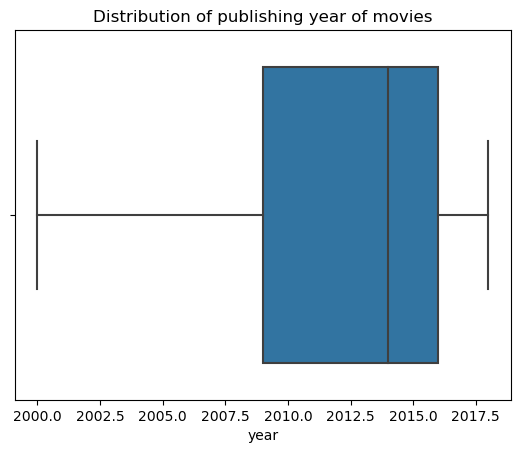

In [39]:
sns.boxplot(x = data['year']).set(title='Distribution of publishing year of movies')

[Text(0.5, 1.0, 'Distribution of movie length')]

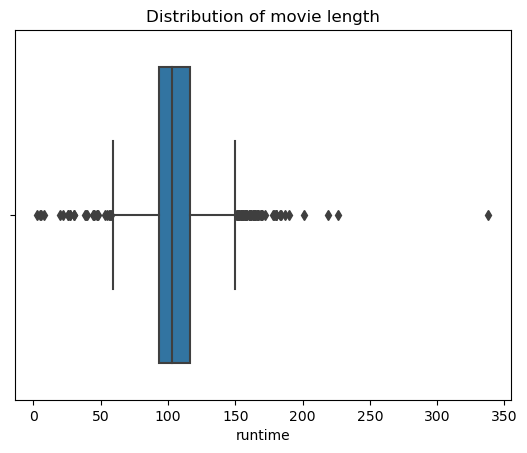

In [40]:
sns.boxplot(x = data['runtime']).set(title='Distribution of movie length')

[Text(0.5, 1.0, 'Distribution of movie rating')]

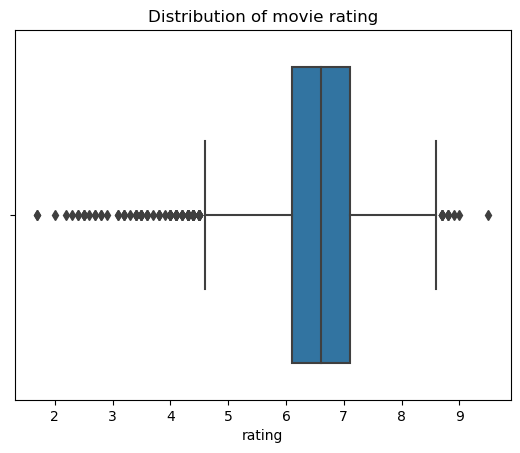

In [41]:
sns.boxplot(x = data['rating']).set(title='Distribution of movie rating')

[Text(0.5, 1.0, 'Number of listed cast members')]

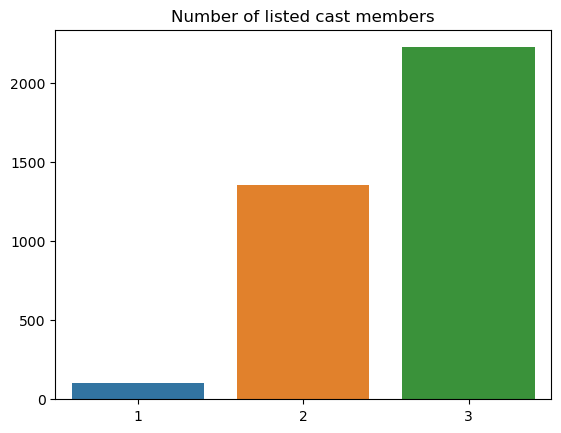

In [42]:
no_cast_members = pd.Series([int(ohe_genre_data['cast'].loc[i].count('|')+1) for i in range(0,len(ohe_genre_data['cast'])) ])
categories = no_cast_members.value_counts().index
counts = no_cast_members.value_counts().values
sns.barplot(x = categories, y= counts).set(title = 'Number of listed cast members')

In [43]:
print('Unique writers number:',len(data['director'].unique()),'\nUnique writers ratio total data: ',len(data['director'].unique())/len(data['director']))
data['director'].value_counts().head(10) 


Unique writers number: 2267 
Unique writers ratio total data:  0.6153637350705755


Ridley Scott         15
Clint Eastwood       15
Steven Spielberg     14
Steven Soderbergh    11
Ron Howard           10
Michael Bay          10
Tim Burton            9
Antoine Fuqua         9
Christopher Nolan     9
Woody Allen           9
Name: director, dtype: int64

In [44]:
print('Unique writers number:',len(data['writers'].unique()),'\nUnique writers ratio total data: ',len(data['writers'].unique())/len(data['director']))
data['writers'].value_counts().head(10)

Unique writers number: 2722 
Unique writers ratio total data:  0.738870792616721


Luc Besson            14
Steven Knight         11
Woody Allen            9
Leigh Whannell         9
Paul W.S. Anderson     8
John Logan             8
Joel Coen              8
Allan Loeb             7
Brian Helgeland        7
Christopher Markus     7
Name: writers, dtype: int64

4

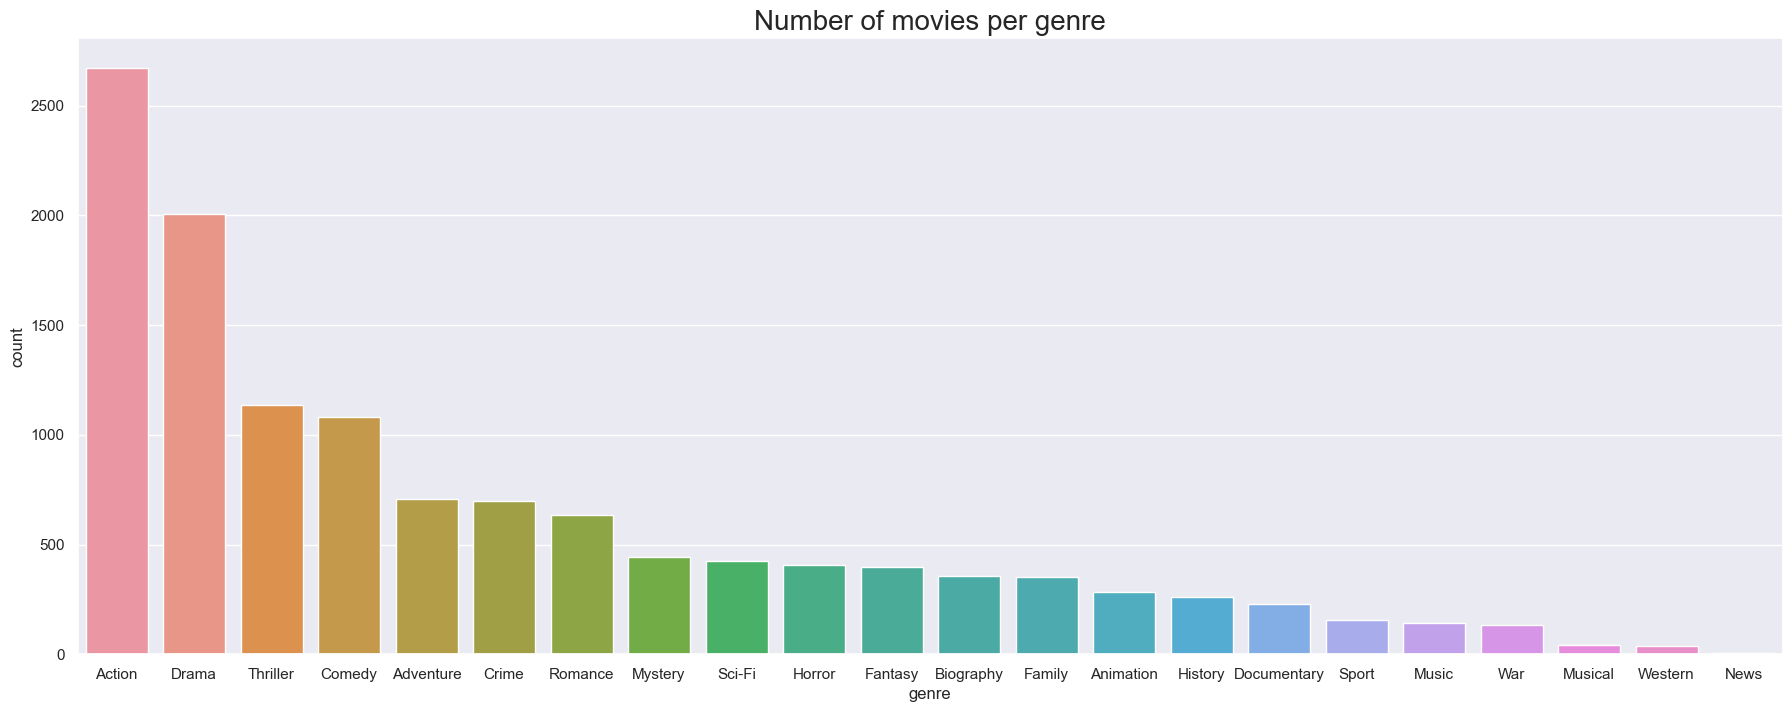

In [77]:
value_genre = [sum(ohe_genre_data[i]) for i in unique_genre]
d = {'genre': unique_genre, 'count': value_genre}
new = pd.DataFrame(data = d)
new = new.sort_values(by = 'count', ascending = False)
sns.set(rc={'figure.figsize':(22,8),'axes.titlesize':20})
sns.barplot(x = new['genre'], y= new['count']).set(title = 'Number of movies per genre')
sum(ohe_genre_data['News'])

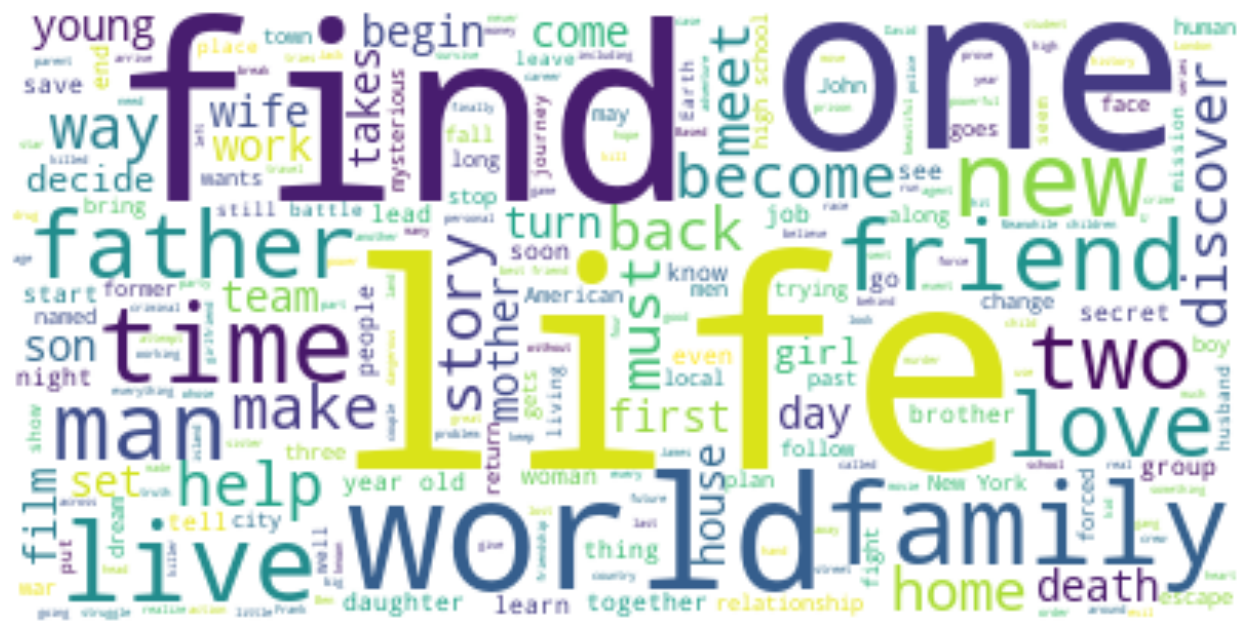

In [67]:
#wordcloud for all summaries: https://www.datacamp.com/tutorial/wordcloud-python
df = ohe_genre_data[['title',"summary",'short_summary']]
text = list(df['summary'])
text = ''.join(text)
# Create stopword list:
my_stopwords = set(STOPWORDS)
my_stopwords.update(["will", "want", "and", "now", "take"])
#print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=my_stopwords,
                      background_color="white",
                      max_words=2000, 
#                       min_font_size =12, 
#                       max_font_size=20,
                      normalize_plurals= True
                      ).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('filename.svg',format =  'svg')
plt.show()

# 4 Analysis of Summaries <a id='sec_summaries'></a>

# 5 Rating Prediction <a id='sec_pred'></a>

# 6 Movie Recommender System <a id='sec_recsys'></a>

In [ ]:
#Needed some space so i moved the code here but feel free to add it up there again


#problem with genres multiple options 

#def ohe_genres(data):
  
#    cats = [
#        'Action',
#        'Documentary|Music',
#        'Adventure',
#        'Animation',
#        'Family',
#        'Fantasy'
#    ]
    
#   cat_type = CategoricalDtype(categories=cats)
    
#    data['genres'] = data['genres'].astype(cat_type)
#   data = pd.get_dummies(data,
#                          prefix='fpq',
#                          columns=['genres'], 
#                         drop_first=True)
    
#    return data
#data = ohe_genres(data)
#data.filter(regex='fpq').head(10)